STATISTICAL ANALYSIS

FOURTH MOVEMENT (Random Intervals):
------------------------------------------------------------
Linear Regression: Success = -0.024692 × Activity + 0.049423
R² = 0.987323
Correlation coefficient (r) = -0.993641
P-value = 0.071830
Standard error = 0.002798

Interpretation: Each unit increase in defender activity
                decreases attacker success by 0.024692

SECOND MOVEMENT (Geometric Distribution, λ=4):
------------------------------------------------------------
Linear Regression: Success = -0.010333 × λ_D + 0.097333
R² = 1.000000
Correlation coefficient (r) = -1.000000
P-value = 0.000000
Standard error = 0.000000

Interpretation: Each unit increase in defense rate (λ_D)
                decreases attacker success by 0.010333

Generating plots...


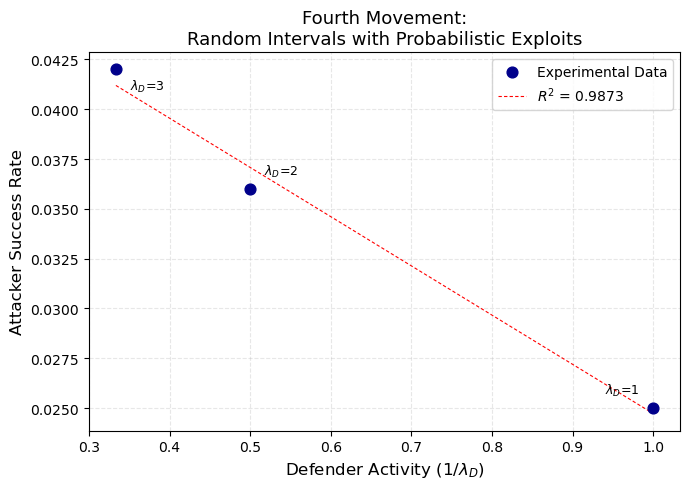

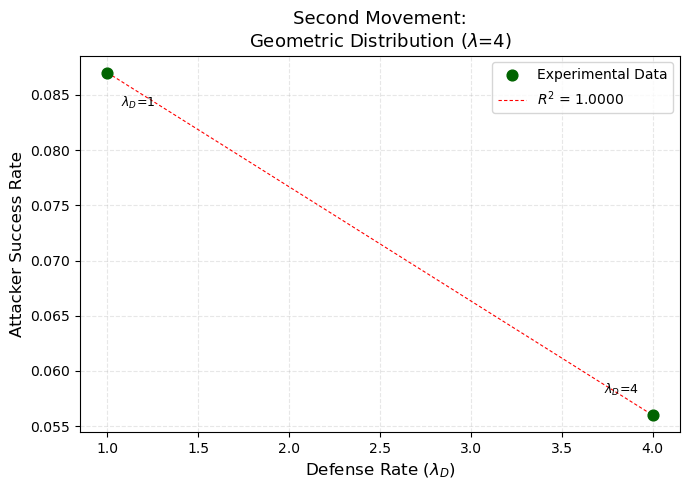

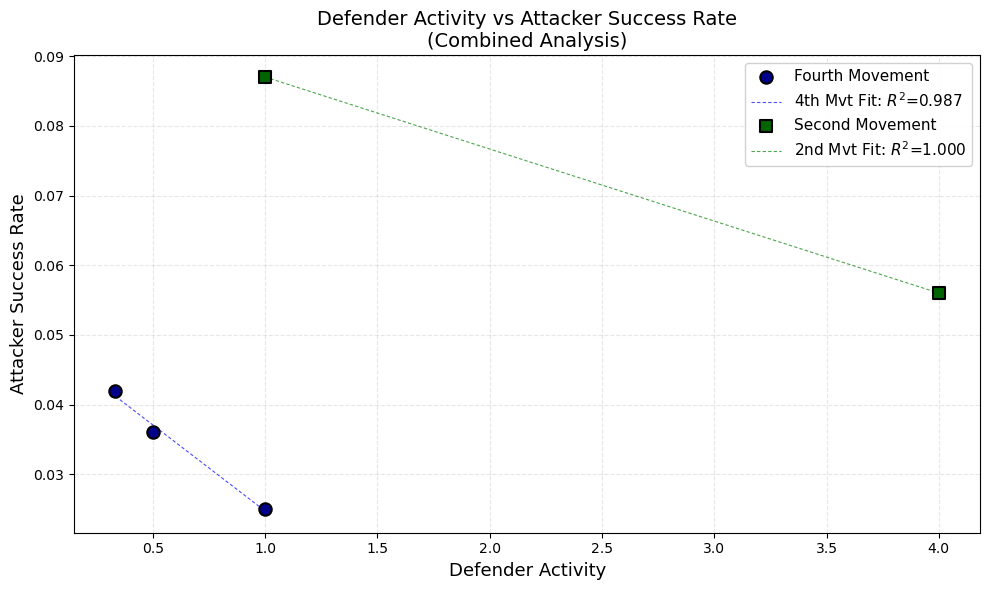


Done!


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data extraction from the tables

# Second Movement (Geometric Distribution)
# Note: For second movement, we only have data at two λ values
second_movement_data = {
    'lambda_1': {
        'lambda_D': [1],
        'success': [0.056]
    },
    'lambda_4': {
        'lambda_D': [1, 4],
        'success': [0.087, 0.056]
    }
}

# Fourth Movement (Random Intervals with Probabilistic Exploits)
# Critical: Higher λ_D = LESS ACTIVE defender (longer breaks between checks)
fourth_movement_data = {
    'lambda_D': [3, 2, 1],  # Less active → More active
    'success': [0.042, 0.036, 0.025]
}


def plot_fourth_movement():
    """
    Plot the Fourth Movement separately
    """
    fig, ax = plt.subplots(figsize=(7, 5))
    
    # Convert λ_D to defender activity (inverse relationship)
    lambda_D_values = np.array(fourth_movement_data['lambda_D'])
    defender_activity = 1.0 / lambda_D_values  # Higher activity = more checks
    success_rates = np.array(fourth_movement_data['success'])
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(defender_activity, success_rates)
    
    # Create fit line
    activity_fit = np.linspace(min(defender_activity), max(defender_activity), 100)
    success_fit = slope * activity_fit + intercept
    
    # Plot
    ax.scatter(defender_activity, success_rates, s=60, color='darkblue', 
                label='Experimental Data', zorder=3)
    ax.plot(activity_fit, success_fit, 'r--', linewidth=0.8, dashes=(3, 2),
             label=f'$R^2$ = {r_value**2:.4f}')
    
    # Annotations with λ_D values - NO BACKGROUND
    for i, (act, succ, lam) in enumerate(zip(defender_activity, success_rates, lambda_D_values)):
        if i == 0:  # λ_D=3
            offset = (10, -15)
        elif i == 1:  # λ_D=2
            offset = (10, 10)
        else:  # λ_D=1 - move to the left
            offset = (-35, 10)
        
        ax.annotate(f'$\\lambda_D$={lam}', 
                    xy=(act, succ), 
                    xytext=offset,
                    textcoords='offset points',
                    fontsize=9)
    
    ax.set_xlabel('Defender Activity (1/$\\lambda_D$)', fontsize=12)
    ax.set_ylabel('Attacker Success Rate', fontsize=12)
    ax.set_title('Fourth Movement:\nRandom Intervals with Probabilistic Exploits', 
                  fontsize=13)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(fontsize=10, loc='best')
    
    plt.tight_layout()
    return fig


def plot_second_movement():
    """
    Plot the Second Movement separately
    """
    fig, ax = plt.subplots(figsize=(7, 5))
    
    # For second movement, λ_D directly represents defense rate (higher = more active)
    lambda_D_second = np.array(second_movement_data['lambda_4']['lambda_D'])
    success_second = np.array(second_movement_data['lambda_4']['success'])
    
    # Linear regression
    slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(lambda_D_second, success_second)
    
    # Create fit line
    lambda_D_fit = np.linspace(min(lambda_D_second), max(lambda_D_second), 100)
    success_fit2 = slope2 * lambda_D_fit + intercept2
    
    # Plot
    ax.scatter(lambda_D_second, success_second, s=60, color='darkgreen', 
                label='Experimental Data', zorder=3)
    ax.plot(lambda_D_fit, success_fit2, 'r--', linewidth=0.8, dashes=(3, 2),
             label=f'$R^2$ = {r_value2**2:.4f}')
    
    # Annotations - NO BACKGROUND
    for i, (lam, succ) in enumerate(zip(lambda_D_second, success_second)):
        if i == 0:  # λ_D=1 - move down
            offset = (10, -25)
        else:  # λ_D=4 - move up and to the left
            offset = (-35, 15)
        
        ax.annotate(f'$\\lambda_D$={lam}', 
                    xy=(lam, succ), 
                    xytext=offset,
                    textcoords='offset points',
                    fontsize=9)
    
    ax.set_xlabel('Defense Rate ($\\lambda_D$)', fontsize=12)
    ax.set_ylabel('Attacker Success Rate', fontsize=12)
    ax.set_title('Second Movement:\nGeometric Distribution ($\\lambda$=4)', 
                  fontsize=13)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(fontsize=10, loc='best')
    
    plt.tight_layout()
    return fig


def plot_combined_normalized():
    """
    Plot both movements on the same axes with normalized defender activity.
    Both converted to: higher activity = better defense
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Fourth Movement: Activity = 1/λ_D
    lambda_D_fourth = np.array(fourth_movement_data['lambda_D'])
    activity_fourth = 1.0 / lambda_D_fourth
    success_fourth = np.array(fourth_movement_data['success'])
    
    # Second Movement: Activity = λ_D
    activity_second = np.array(second_movement_data['lambda_4']['lambda_D'])
    success_second = np.array(second_movement_data['lambda_4']['success'])
    
    # Plot Fourth Movement
    slope_f, intercept_f, r_f, _, _ = stats.linregress(activity_fourth, success_fourth)
    activity_fit_f = np.linspace(min(activity_fourth), max(activity_fourth), 100)
    success_fit_f = slope_f * activity_fit_f + intercept_f
    
    ax.scatter(activity_fourth, success_fourth, s=80, color='darkblue', 
              marker='o', label='Fourth Movement', zorder=3, edgecolors='black', linewidth=1.5)
    ax.plot(activity_fit_f, success_fit_f, 'b--', linewidth=0.8, dashes=(3, 2), alpha=0.7,
           label=f'4th Mvt Fit: $R^2$={r_f**2:.3f}')
    
    # Plot Second Movement
    slope_s, intercept_s, r_s, _, _ = stats.linregress(activity_second, success_second)
    activity_fit_s = np.linspace(min(activity_second), max(activity_second), 100)
    success_fit_s = slope_s * activity_fit_s + intercept_s
    
    ax.scatter(activity_second, success_second, s=80, color='darkgreen', 
              marker='s', label='Second Movement', zorder=3, edgecolors='black', linewidth=1.5)
    ax.plot(activity_fit_s, success_fit_s, 'g--', linewidth=0.8, dashes=(3, 2), alpha=0.7,
           label=f'2nd Mvt Fit: $R^2$={r_s**2:.3f}')
    
    ax.set_xlabel('Defender Activity', fontsize=13)
    ax.set_ylabel('Attacker Success Rate', fontsize=13)
    ax.set_title('Defender Activity vs Attacker Success Rate\n(Combined Analysis)', 
                fontsize=14)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(fontsize=11, loc='best', framealpha=0.9)
    
    plt.tight_layout()
    return fig


def print_statistics():
    """Print detailed statistics about the relationships"""
    print("="*60)
    print("STATISTICAL ANALYSIS")
    print("="*60)
    
    # Fourth Movement
    print("\nFOURTH MOVEMENT (Random Intervals):")
    print("-" * 60)
    lambda_D_values = np.array(fourth_movement_data['lambda_D'])
    defender_activity = 1.0 / lambda_D_values
    success_rates = np.array(fourth_movement_data['success'])
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(defender_activity, success_rates)
    
    print(f"Linear Regression: Success = {slope:.6f} × Activity + {intercept:.6f}")
    print(f"R² = {r_value**2:.6f}")
    print(f"Correlation coefficient (r) = {r_value:.6f}")
    print(f"P-value = {p_value:.6f}")
    print(f"Standard error = {std_err:.6f}")
    print(f"\nInterpretation: Each unit increase in defender activity")
    print(f"                decreases attacker success by {abs(slope):.6f}")
    
    # Second Movement
    print("\n" + "="*60)
    print("SECOND MOVEMENT (Geometric Distribution, λ=4):")
    print("-" * 60)
    lambda_D_second = np.array(second_movement_data['lambda_4']['lambda_D'])
    success_second = np.array(second_movement_data['lambda_4']['success'])
    
    slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(lambda_D_second, success_second)
    
    print(f"Linear Regression: Success = {slope2:.6f} × λ_D + {intercept2:.6f}")
    print(f"R² = {r_value2**2:.6f}")
    print(f"Correlation coefficient (r) = {r_value2:.6f}")
    print(f"P-value = {p_value2:.6f}")
    print(f"Standard error = {std_err2:.6f}")
    print(f"\nInterpretation: Each unit increase in defense rate (λ_D)")
    print(f"                decreases attacker success by {abs(slope2):.6f}")
    print("="*60)


if __name__ == "__main__":
    # Print statistics
    print_statistics()
    
    # Create plots
    print("\nGenerating plots...")
    
    # Create separate plots for each movement
    fig1 = plot_fourth_movement()
    fig2 = plot_second_movement()
    
    # Combined normalized plot
    fig3 = plot_combined_normalized()
    
    plt.show()
    print("\nDone!")